In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv('../data/external/googleplaystore.csv')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
## Converting the String Installs to number by removing unwanted characters
data.Installs = data['Installs'].map(lambda x: x.rstrip('+').replace(',','').replace('Free', '0'))
data.Installs = data.Installs.astype(int)
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6541,BN Pro White Text,LIBRARIES_AND_DEMO,4.4,50,506k,5000,Free,0,Everyone,Libraries & Demo,"February 5, 2017",2.3.2,1.6 and up
5321,Al Quran (Tafsir & by Word),BOOKS_AND_REFERENCE,4.8,57400,14M,500000,Free,0,Everyone,Books & Reference,"July 30, 2018",1.6.5,4.0 and up
4680,Vimeo,FAMILY,3.9,85578,Varies with device,10000000,Free,0,Teen,Entertainment,"August 1, 2018",Varies with device,Varies with device
7630,Dots & Co: A Puzzle Adventure,FAMILY,4.5,81001,85M,1000000,Free,0,Everyone,Puzzle,"April 27, 2018",2.15.2,4.1 and up
6542,Sam.BN,TOOLS,NaN,83,2.0M,1000,Free,0,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up


#### The null values present in the data set are

In [4]:

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Since the count of ratings which are null are high and some of them greater than 5 lets remove them

In [5]:
data = data[(~data.Rating.isnull())]
data = data[data.Rating < 5]
data.Rating.describe()

count    9092.000000
mean        4.167400
std         0.503159
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         4.900000
Name: Rating, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 10840
Data columns (total 13 columns):
App               9092 non-null object
Category          9092 non-null object
Rating            9092 non-null float64
Reviews           9092 non-null object
Size              9092 non-null object
Installs          9092 non-null int64
Type              9092 non-null object
Price             9092 non-null object
Content Rating    9092 non-null object
Genres            9092 non-null object
Last Updated      9092 non-null object
Current Ver       9088 non-null object
Android Ver       9090 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 994.4+ KB


In [7]:
data.drop_duplicates()
data.shape

(9092, 13)

In [8]:
data=data.drop(["Last Updated","Android Ver","Current Ver","Type","Size",],1)



In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 10840
Data columns (total 8 columns):
App               9092 non-null object
Category          9092 non-null object
Rating            9092 non-null float64
Reviews           9092 non-null object
Installs          9092 non-null int64
Price             9092 non-null object
Content Rating    9092 non-null object
Genres            9092 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 639.3+ KB


In [10]:
data.Rating.describe()

count    9092.000000
mean        4.167400
std         0.503159
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         4.900000
Name: Rating, dtype: float64

In [11]:
data.shape

(9092, 8)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 10840
Data columns (total 8 columns):
App               9092 non-null object
Category          9092 non-null object
Rating            9092 non-null float64
Reviews           9092 non-null object
Installs          9092 non-null int64
Price             9092 non-null object
Content Rating    9092 non-null object
Genres            9092 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 639.3+ KB


In [13]:
data2 = pd.read_csv('../data/external/googleplaystore_user_reviews.csv')
data2.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
63161,Homescapes,It way hard get levels get star level tasks us...,Negative,-0.030556,0.397222
80,10 Best Foods for You,Best Best,Positive,1.000000,0.300000
896,4 in a Row,It's great game keep u busy hours..... Obvious...,Positive,0.125000,0.487500
29034,Content Transfer,I sure difficult would app. I harrassed childr...,Positive,0.130208,0.696296
20223,CMB Free Dating App,The messages buggy. They show WiFi turned on.,Neutral,0.000000,0.000000
36288,Dragon Sim Online: Be A Dragon,NaN,NaN,NaN,NaN
48423,Four In A Line,TO PENG AND GOOF BRILLIANT THANKS FOR THE FIRS...,Positive,0.450000,0.511111
9841,Azar,Over heating battery issue app.,Neutral,0.000000,0.000000
31821,DEAD TARGET: FPS Zombie Apocalypse Survival Games,A game of beautiful Ouye and Salih Jarboha and...,Positive,0.225000,0.700000
26425,Chrome Beta,Give option remove home button search bar bett...,Positive,0.500000,0.500000


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
App                       64295 non-null object
Translated_Review         37427 non-null object
Sentiment                 37432 non-null object
Sentiment_Polarity        37432 non-null float64
Sentiment_Subjectivity    37432 non-null float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [15]:
data2.dropna(thresh=2, inplace=True)
data2.reset_index(drop=True, inplace=True)
data2.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
4738,Angry Birds Classic,"I've lost many power ups due freezing screens,...",Negative,-0.043056,0.490278
3689,All Social Networks,The allow open social media outlets,Positive,0.016667,0.283333
957,8 Ball Pool,First need work rotation screen. Your game can...,Positive,0.052500,0.356667
3004,Agoda – Hotel Booking Deals,Very best appilication I'm Agoda fan Myanmar,Positive,1.000000,0.390000
35351,Helix Jump,This game bores never-ending ads. If decide bu...,Neutral,0.000000,0.375000
22066,Duolingo: Learn Languages Free,Generally good encourages regular practice. Gr...,Positive,0.333333,0.438370
27106,Flight & Hotel Booking App - ixigo,Not good experience although fine Should give ...,Negative,-0.040278,0.533333
5980,AutoCAD - DWG Viewer & Editor,It sucks,Negative,-0.300000,0.300000
3667,All Social Networks,This work I recommend anyone using waist time ...,Neutral,0.000000,0.000000
2485,AdWords Express,Great business,Positive,0.800000,0.750000


In [16]:
data3=pd.merge(data, data2, on='App')
data3.sample(10)

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
50604,Badoo - Free Chat & Dating App,SOCIAL,4.3,3781467,100000000,0,Mature 17+,Social,Not opening..just loading continuously verifyi...,Neutral,0.000000,0.000000
41351,DRAGON BALL LEGENDS,GAME,4.6,337913,5000000,0,Teen,Action,Pls increase chances sparking characters borin...,Negative,-0.133333,0.800000
39438,Bowmasters,GAME,4.7,1536349,50000000,0,Teen,Action,The game fun. But advert every battle constant...,Negative,-0.060000,0.306667
49215,Free Hypnosis,MEDICAL,4.2,4303,100000,0,Everyone,Medical,CHANGED MY LIFE FOREVER The best hypnosis teac...,Positive,0.766667,0.700000
41400,DRAGON BALL LEGENDS,GAME,4.6,338742,5000000,0,Teen,Action,Garbage. The backup system trash. Spent loads ...,Negative,-0.100000,0.100000
53704,Google Photos,PHOTOGRAPHY,4.5,10847682,1000000000,0,Everyone,Photography,Out photo I've used I enjoy features most. The...,Positive,0.231006,0.408442
34290,Flow Free,GAME,4.3,1295625,100000000,0,Everyone,Puzzle,far best mobile game available. With new packs...,Positive,0.083566,0.454745
58698,"Expedia Hotels, Flights & Car Rental Travel Deals",TRAVEL_AND_LOCAL,4.1,136626,10000000,0,Everyone,Travel & Local,Randomly makes bookings Canadian American Expe...,Negative,-0.060714,0.310714
32394,Granny,GAME,4.5,1137271,50000000,0,Teen,Arcade,"This well made, scary horror game. Granny favo...",Positive,0.004375,0.570000
4302,Gmail,COMMUNICATION,4.3,4604483,1000000000,0,Everyone,Communication,You guys missed great opportunity took ability...,Positive,0.616667,0.791667


In [17]:
ss = data3.where( data3.Category == 'ART_AND_DESIGN')
ss.Sentiment.value_counts()['Positive']

259

# Analysis

### Which apps got highest installs ?

In [18]:
data.sort_values(by='Installs', ascending=False).head(5)

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres
2545,Instagram,SOCIAL,4.5,66577313,1000000000,0,Teen,Social
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1000000000,0,Everyone,Communication
3523,Google Drive,PRODUCTIVITY,4.4,2731211,1000000000,0,Everyone,Productivity
2604,Instagram,SOCIAL,4.5,66577446,1000000000,0,Teen,Social
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,1000000000,0,Everyone,Communication


### How many apps fall under different content ratings

In [19]:
data.groupby(['Content Rating']).size()

Content Rating
Adults only 18+       3
Everyone           7181
Everyone 10+        395
Mature 17+          450
Teen               1062
Unrated               1
dtype: int64

## Graph Analysis

### Sentiments vs Catagory

wecould be able to see the relative sentiment of users on a given category of apps by using this.

In [20]:
## Data modification for sentiment vs Category

finalFrame = pd.DataFrame(columns=['Category', 'Sentiment', 'Count'])
for eachCategory in data3['Category'].unique():
    tempRow = dict()
    tempRow['Category'] = eachCategory
    
    for sent in ['Neutral', 'Positive', 'Negative']:
        dfOfCategory = data3.where( data3.Category == eachCategory)
        tempRow['Sentiment'] = sent
        tempRow['Count'] = dfOfCategory.Sentiment.value_counts()[sent]
        finalFrame = finalFrame.append(tempRow, ignore_index = True)

finalFrame.sample(10)   

,Category,Sentiment,Count
39,FOOD_AND_DRINK,Neutral,107
77,TOOLS,Negative,347
36,FINANCE,Neutral,255
93,NEWS_AND_MAGAZINES,Neutral,244
31,ENTERTAINMENT,Positive,1486
63,SOCIAL,Neutral,268
86,PARENTING,Negative,23
85,PARENTING,Positive,185
73,TRAVEL_AND_LOCAL,Positive,1824
23,COMICS,Negative,2


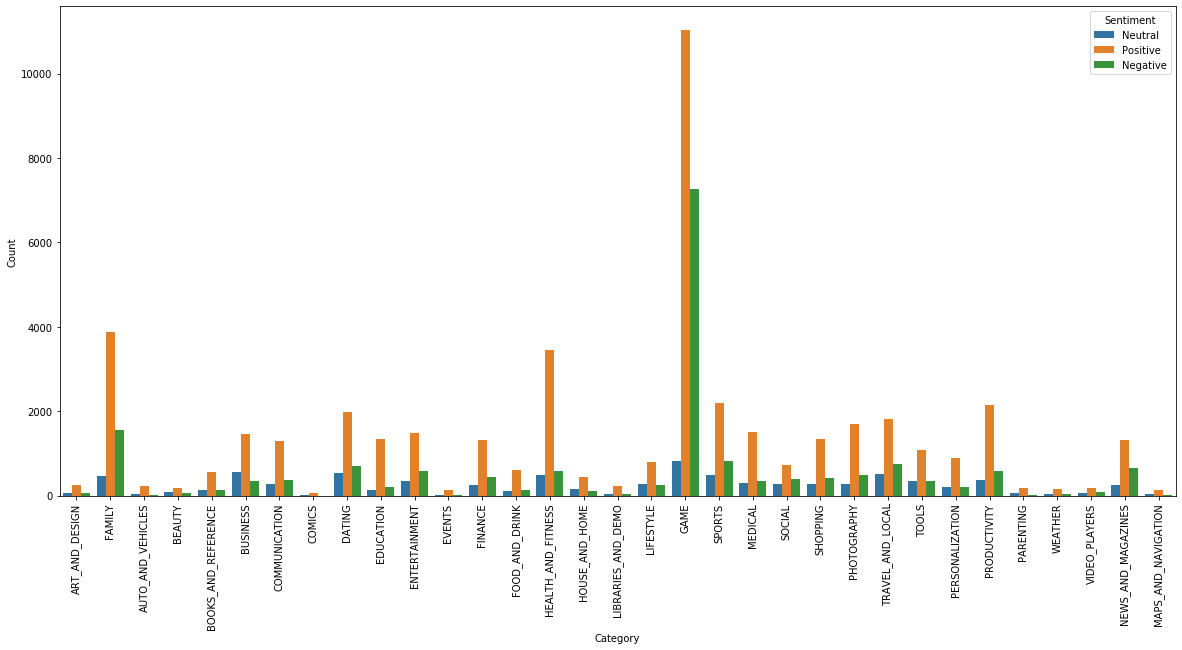

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,9))
finalFrame.Count = finalFrame.Count.astype(float)
g = sns.barplot(x=finalFrame.Category, y=finalFrame.Count, hue=finalFrame.Sentiment)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

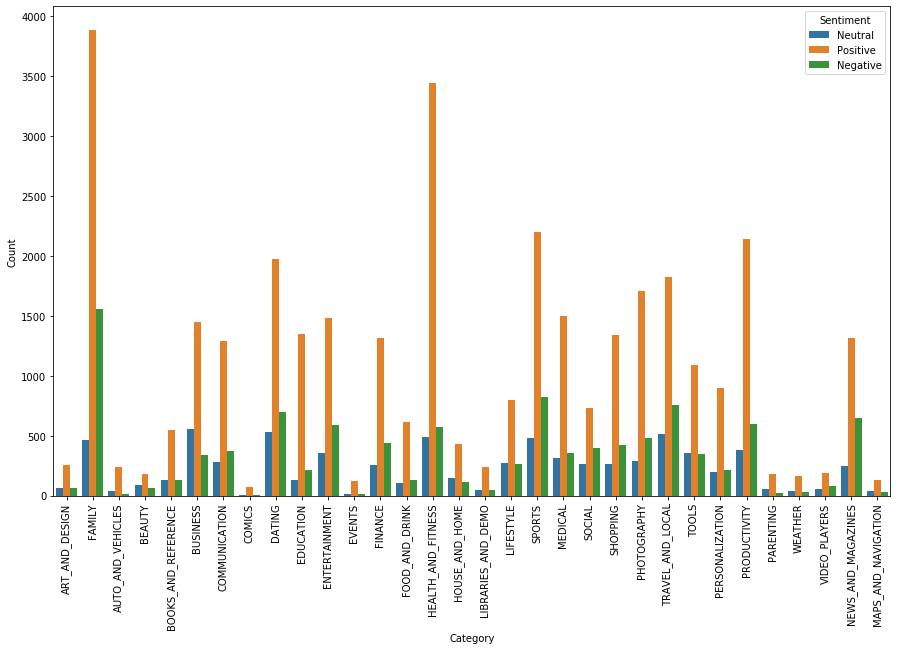

In [22]:
## Category: Game is dominating the graph lets try by removing that out

finalFrameWithoutGame = finalFrame.drop([54,55,56])
plt.figure(figsize=(15,9))
g = sns.barplot(x=finalFrameWithoutGame.Category, y=finalFrameWithoutGame.Count, hue=finalFrameWithoutGame.Sentiment)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

### Ratings Vs Installs

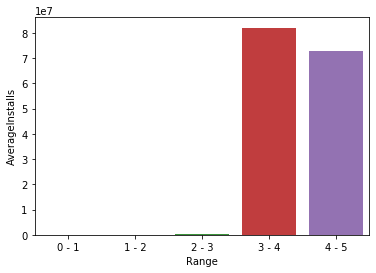

In [23]:
graphFrame = pd.DataFrame(columns=['Range', 'AverageInstalls'])

for i in range(0, 5):
    addRow = dict()
    addRow['Range'] = str(i) + ' - ' + str(i+1)
    tempData = data3[data3.Rating > i]
    tempData = tempData[tempData.Rating < (i+1)]
    avg = tempData.Installs.mean()
    addRow['AverageInstalls'] = avg
    graphFrame = graphFrame.append(addRow, ignore_index =True)

graphFrame

sns.barplot(x=graphFrame.Range, y=graphFrame.AverageInstalls)

### Rating vs category

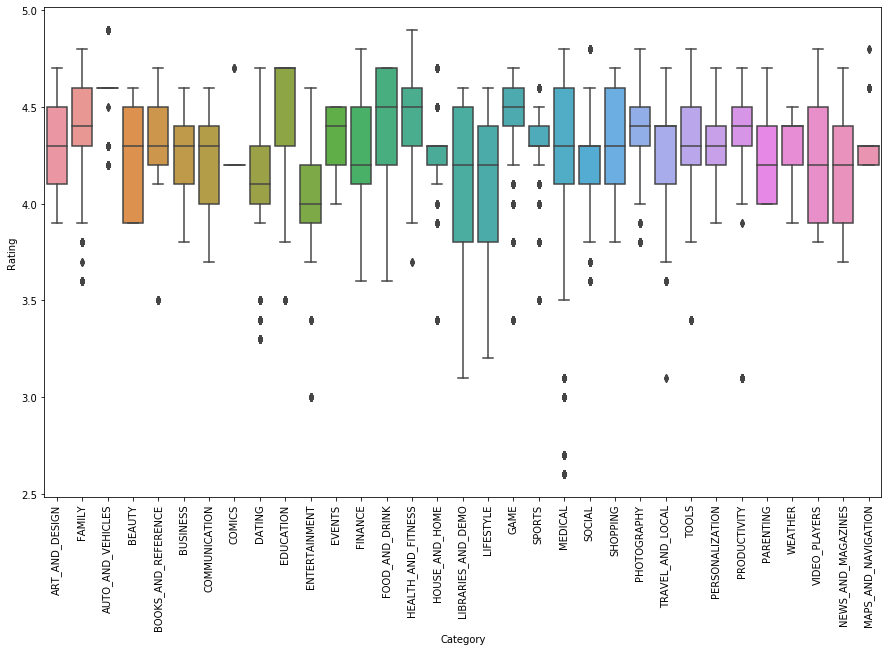

In [24]:
plt.figure(figsize=(15,9))
g = sns.boxplot(x=data3.Category, y=data3.Rating)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

### How many apps in each Category ??

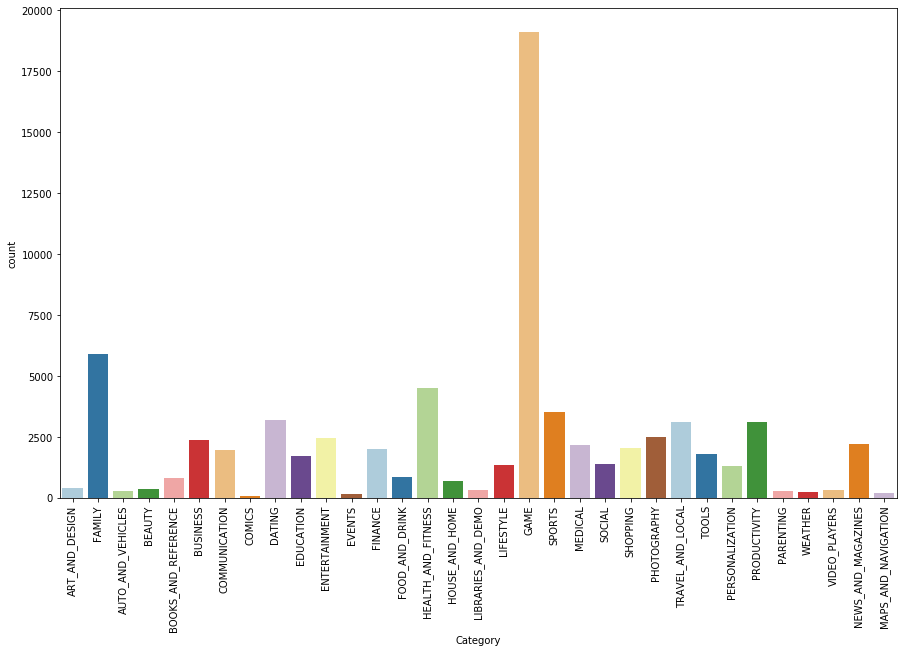

In [25]:
plt.figure(figsize=(15,9))
g = sns.countplot(x='Category', data=data3, palette='Paired')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

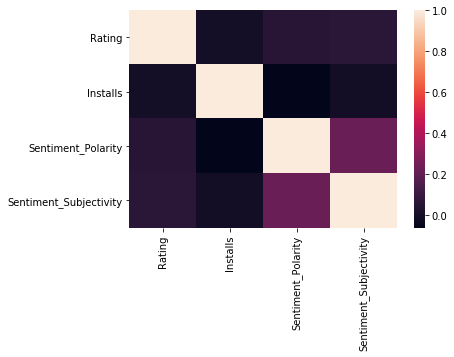

In [26]:
corr = data3.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [27]:
data3.dtypes


App                        object
Category                   object
Rating                    float64
Reviews                    object
Installs                    int64
Price                      object
Content Rating             object
Genres                     object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

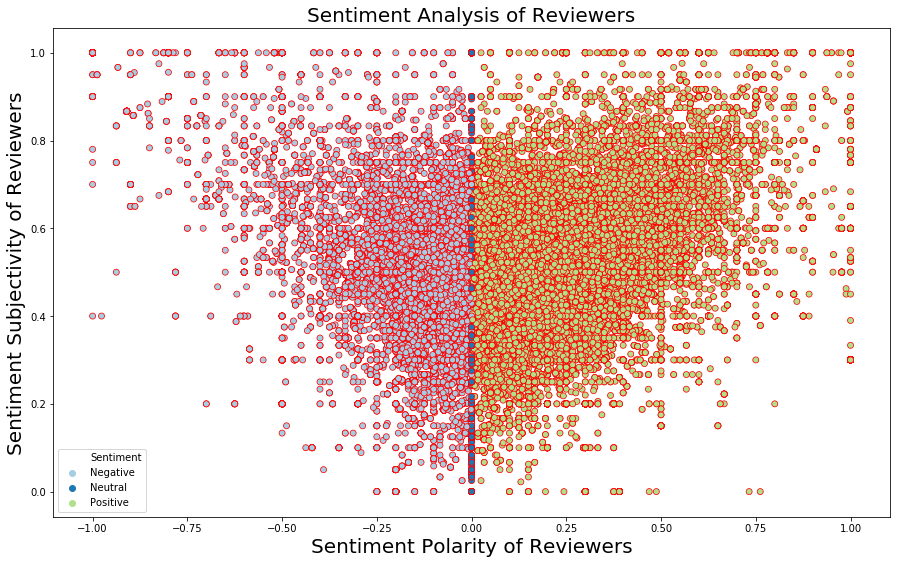

In [28]:
plt.figure(figsize=(15,9))
j = sns.scatterplot(data3['Sentiment_Polarity'],data3['Sentiment_Subjectivity'],hue=data3['Sentiment'], edgecolor='red',palette="Paired")
plt.xlabel('Sentiment Polarity of Reviewers', fontsize=20)
plt.ylabel('Sentiment Subjectivity of Reviewers', fontsize=20)
plt.title("Sentiment Analysis of Reviewers", fontsize=20)
plt.show()

